In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
train = pd.read_csv(r'/kaggle/input/playground-series-s4e4/train.csv')
train = train.set_index("id")
test = pd.read_csv(r'/kaggle/input/playground-series-s4e4/test.csv')
#original = pd.read_csv(f'/kaggle/input/playgrounds4e04originaldata/Original.csv', index_col=0)

In [93]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = ohe.fit_transform(train[["Sex"]]).toarray()

ohe1 = OneHotEncoder(handle_unknown='ignore')
encoded_a_data = ohe1.fit_transform(test[["Sex"]]).toarray()

In [94]:
train[ohe.get_feature_names_out()] = encoded_data
test[ohe1.get_feature_names_out()] = encoded_a_data
test = test.drop('Sex', axis=1)
train = train.drop('Sex', axis=1)

In [95]:
train

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1.0,0.0,0.0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1.0,0.0,0.0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.0,1.0,0.0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.0,0.0,1.0
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6,0.0,0.0,1.0
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9,0.0,0.0,1.0
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6,0.0,1.0,0.0


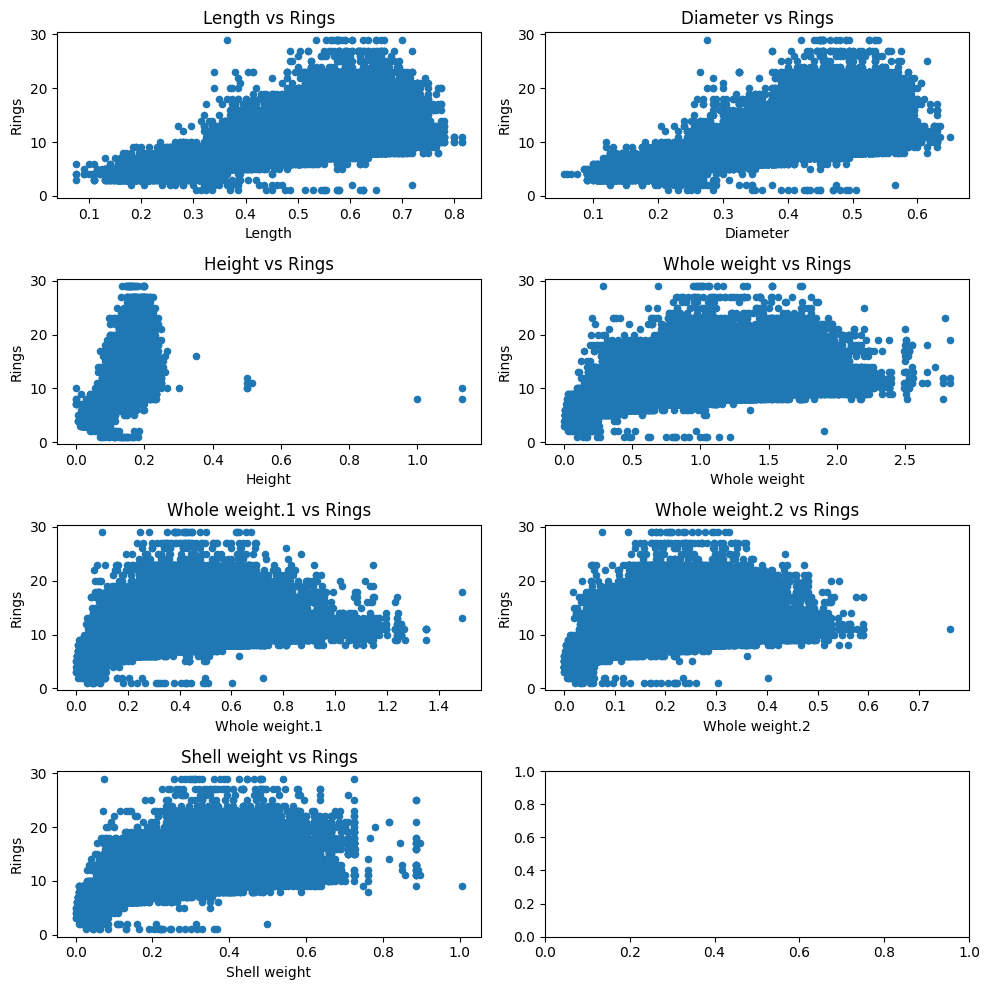

In [96]:
columns = train.columns.drop(['Rings','Sex_F','Sex_I','Sex_M'])

# Create a grid of subplots (5 rows x 4 columns) for the 20 plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
axes = axes.flatten()

# Loop through each column and create a scatter plot against the target
for i, col in enumerate(columns):
    ax = axes[i]
    train.plot(x=col, y='Rings', kind='scatter', ax=ax)
    ax.set_title(f'{col} vs Rings')

# Adjust the layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

<Axes: >

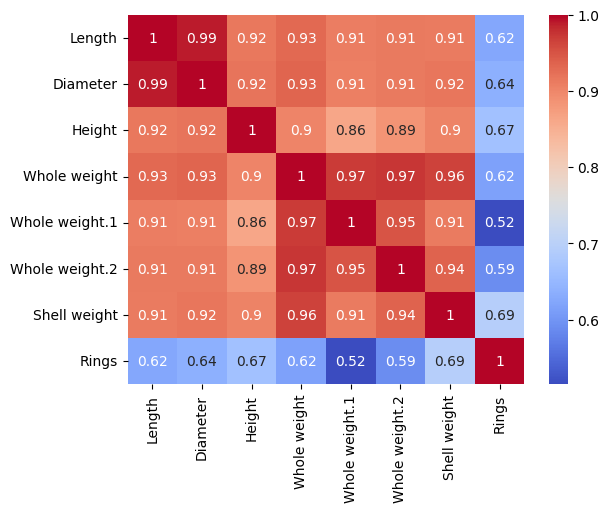

In [97]:
sns.heatmap(train.drop(['Sex_F','Sex_I','Sex_M'], axis = 1).corr(), annot=True, cmap='coolwarm')

In [98]:
feature , lable = train[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
                            'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']],train["Rings"]

In [99]:
def feature_engineering(feature):
    feature["L/D"] = feature['Length']/feature["Diameter"]
    feature["D/H"] = feature["Diameter"]/feature["Height"]
    feature["weight_ratio1"] = feature["Whole weight"]/feature["Whole weight.1"]
    feature["weight_ratio2"] = feature["Whole weight"]/feature["Whole weight.2"]
    feature["weight_shell"] = feature["Whole weight"]/feature["Shell weight"]
    feature["logLength"] = np.log(feature["Length"])
    feature["logDiameter"] = np.log(feature["Diameter"])
    feature["logHeight"] = np.log(feature["Height"] + 1e-6)
    feature["logWhole weight"] = np.log(feature["Whole weight"])
    feature["logWhole weight.1"] = np.log(feature["Whole weight.1"])
    feature["logWhole weight.2"] = np.log(feature["Whole weight.2"])
    feature["logShell weight"] = np.log(feature["Shell weight"])
    feature["Vol"] = feature["Length"] * feature["Diameter"] * feature["Height"]
    r = feature["Diameter"] / 2
    feature["SurfArea"] = 2 * np.pi * r * feature["Height"] + 2 * np.pi * r**2
    feature["Density"] = feature["Whole weight"] / feature["Vol"]
    feature["Meat/Shell"] = feature["Whole weight.2"] / feature["Shell weight"]
    feature["Viscera/Meat"] = feature["Whole weight.1"] / feature["Whole weight.2"]
    feature["Total/Shell"] = feature["Whole weight"] / feature["Shell weight"]


    return feature
test = feature_engineering(test)
feature = feature_engineering(feature)

In [100]:
np.isinf(test).mean()[np.isinf(test).mean() > 0]

D/H        0.000033
Density    0.000033
dtype: float64

In [101]:
np.isinf(feature).mean()[np.isinf(feature).mean() > 0]

D/H        0.000066
Density    0.000066
dtype: float64

In [102]:
feature.isna().mean()[feature.isna().mean() > 0]

Series([], dtype: float64)

In [103]:
feature = feature.replace([np.inf, -np.inf], np.nan)
test = test.replace([np.inf, -np.inf], np.nan)

In [104]:
feature.isna().mean()[feature.isna().mean() > 0]

D/H        0.000066
Density    0.000066
dtype: float64

In [105]:
test.isna().mean()[test.isna().mean() > 0]

D/H        0.000033
Density    0.000033
dtype: float64

<Axes: >

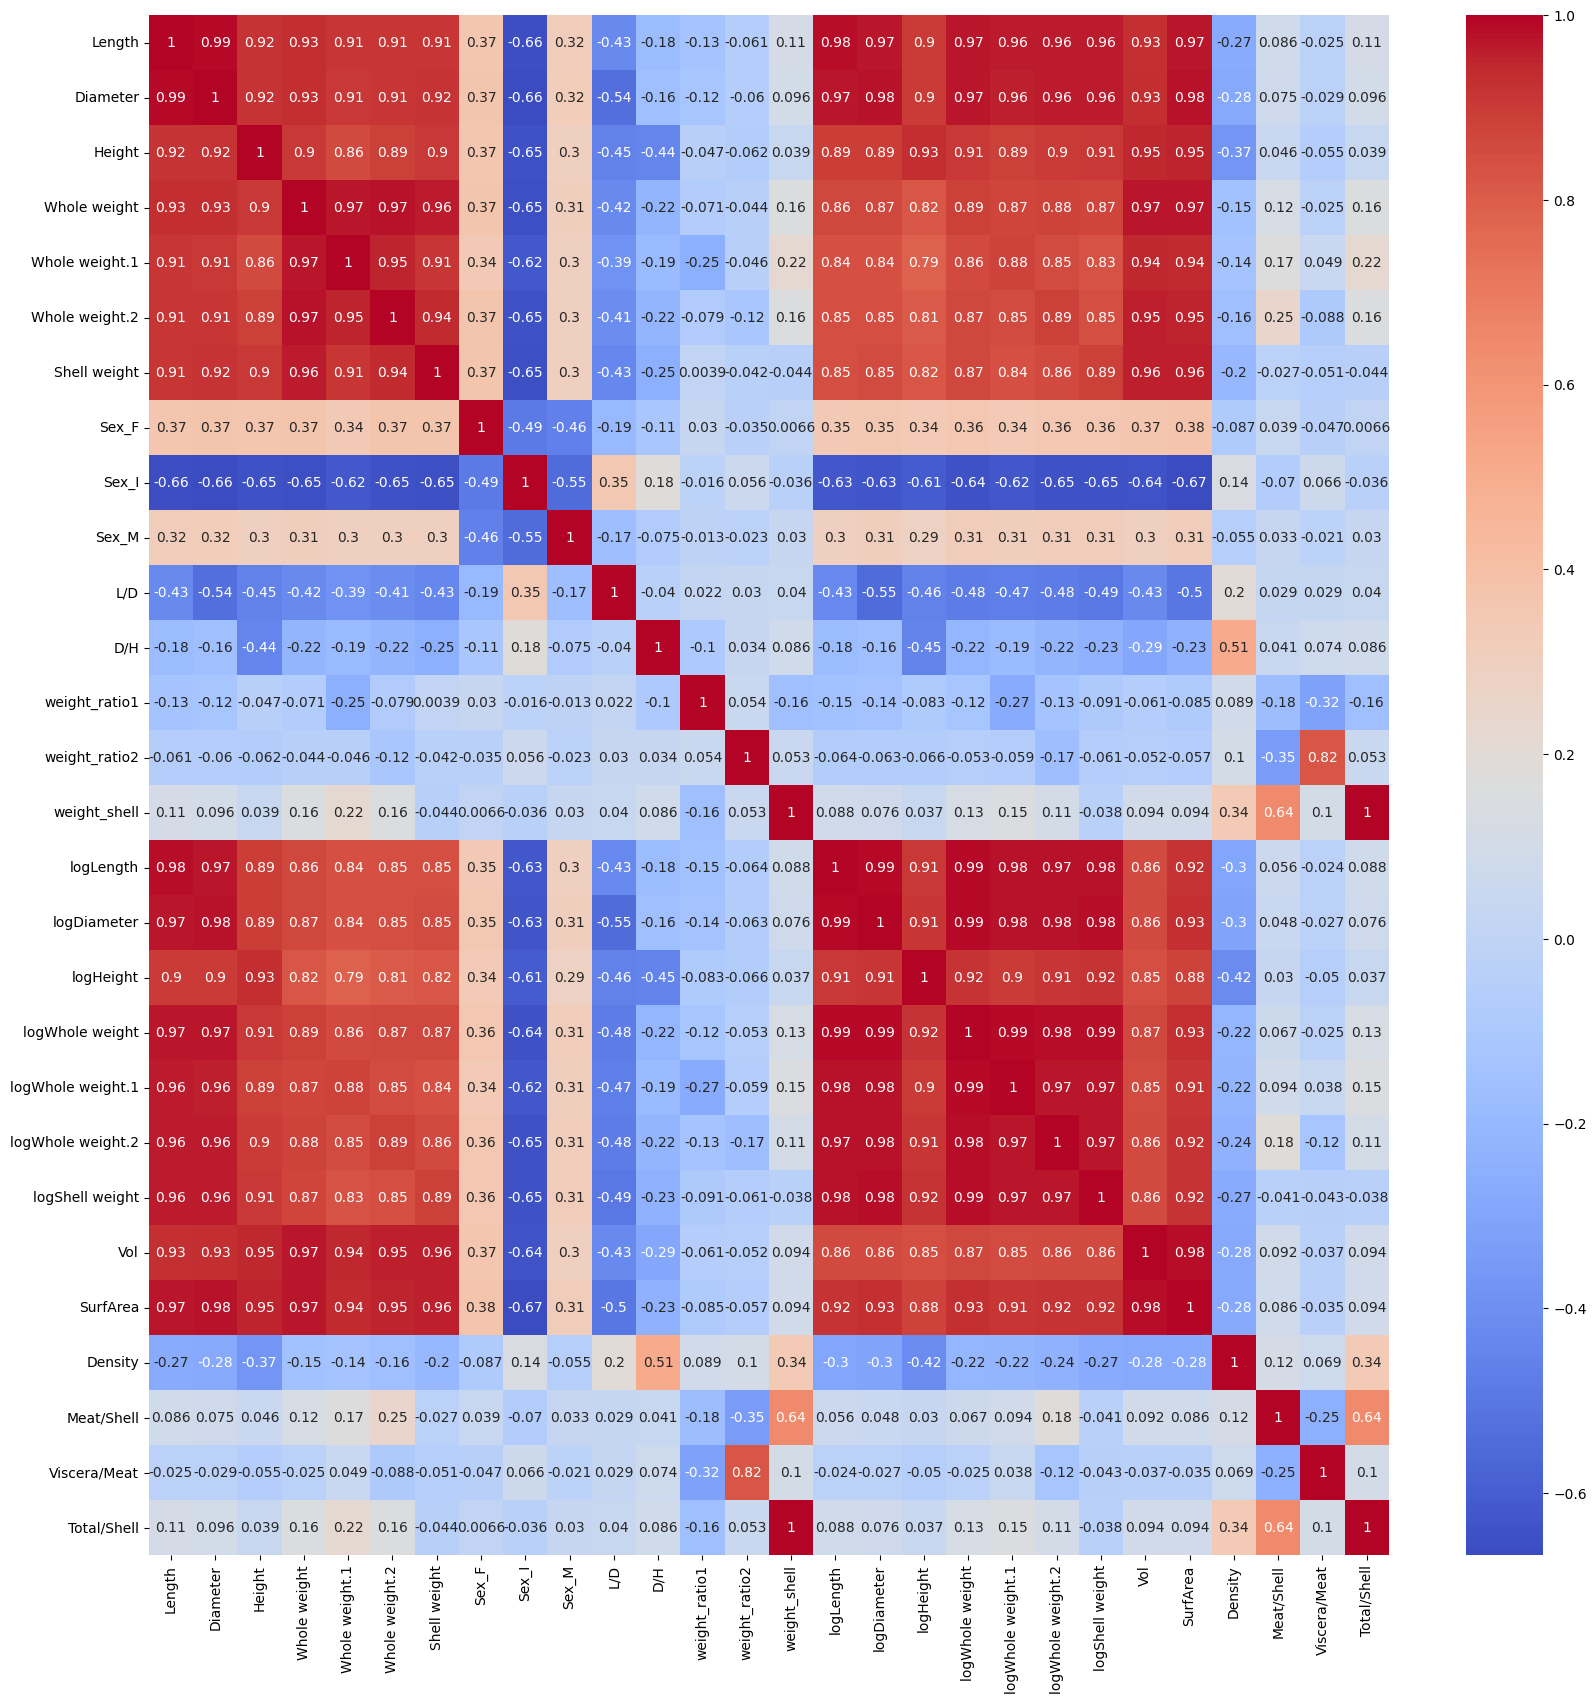

In [106]:
plt.figure(figsize=(20,20))
sns.heatmap(feature.corr(), annot=True, cmap='coolwarm')

In [107]:
corr_matrix = feature.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
feature_df = feature.drop(columns=to_drop , axis = 1)
feature_df

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,Length,Sex_F,Sex_I,Sex_M,L/D,D/H,weight_ratio1,weight_ratio2,weight_shell,Density,Meat/Shell,Viscera/Meat
id,,,,,,,,,,,,
0,0.550,1.0,0.0,0.0,1.279070,2.866667,2.348554,5.266212,3.214583,21.747710,0.610417,2.242321
1,0.630,1.0,0.0,0.0,1.285714,3.379310,2.467249,4.086799,3.531250,25.244909,0.864063,1.656420
2,0.160,0.0,1.0,0.0,1.454545,4.400000,3.818182,7.000000,4.200000,47.727273,0.600000,1.833333
3,0.595,0.0,0.0,1.0,1.252632,3.166667,2.435419,4.450122,3.658000,21.571576,0.822000,1.827251
4,0.555,0.0,1.0,0.0,1.305882,3.269231,2.116373,4.887500,3.959494,25.502426,0.810127,2.309375
...,...,...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.0,0.0,1.0,1.425532,3.133333,2.313869,4.283784,3.522222,26.844501,0.822222,1.851351
90611,0.555,0.0,0.0,1.0,1.305882,2.833333,2.274256,4.842975,3.662500,24.843667,0.756250,2.129477
90612,0.435,0.0,1.0,0.0,1.318182,3.473684,2.129139,4.095541,3.944785,23.575134,0.963190,1.923567


In [108]:
test = test[feature_df.columns]
test

,Length,Sex_F,Sex_I,Sex_M,L/D,D/H,weight_ratio1,weight_ratio2,weight_shell,Density,Meat/Shell,Viscera/Meat
0,0.645,0.0,0.0,1.0,1.357895,3.064516,2.001617,3.961600,4.119800,26.069675,1.039933,1.979200
1,0.580,0.0,0.0,1.0,1.260870,2.875000,2.054336,4.478360,3.574545,23.027549,0.798182,2.179954
2,0.560,0.0,0.0,1.0,1.333333,3.000000,2.381560,4.550136,3.490644,25.495019,0.767152,1.910569
3,0.570,0.0,0.0,1.0,1.163265,3.379310,2.479433,4.686327,3.719149,21.581046,0.793617,1.890080
4,0.415,0.0,1.0,0.0,1.276923,2.954545,2.273016,5.343284,3.409524,24.130087,0.638095,2.350746
...,...,...,...,...,...,...,...,...,...,...,...,...
60406,0.345,0.0,1.0,0.0,1.326923,3.058824,2.414966,6.698113,3.550000,23.280215,0.530000,2.773585
60407,0.525,1.0,0.0,0.0,1.280488,2.827586,2.173745,5.056886,4.119512,27.057551,0.814634,2.326347
60408,0.590,0.0,1.0,0.0,1.340909,2.838710,2.854962,5.610000,4.233962,27.884090,0.754717,1.965000
60409,0.660,1.0,0.0,0.0,1.257143,2.763158,2.537808,4.177622,3.433333,22.685502,0.821839,1.646154


In [125]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV , KFold , GridSearchCV 
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

In [110]:
x_train,x_test,y_train,y_test = train_test_split(feature_df,lable,test_size=0.2,random_state=37)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((72492, 12), (18123, 12), (72492,), (18123,))

In [111]:
#Grid Search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBRegressor(tree_method='hist', random_state=42)
gs = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    n_jobs=-1,
    verbose=1
)
gs.fit(x_train, y_train)
print("Best params:", gs.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'subsample': 1.0}


In [112]:
model_gs = gs.best_estimator_
pred_gs = model_gs.predict(x_test)
mean_squared_error(y_test , pred_gs)

3.5367361582351178

In [113]:
param_dist = {
    'learning_rate': stats.loguniform(1e-3, 0.3),
    'max_depth': stats.randint(3, 10),
    'subsample': stats.uniform(0.5, 0.5),
    'colsample_bytree': stats.uniform(0.5, 0.5),
    'gamma': stats.uniform(0, 5),
    'reg_alpha': stats.loguniform(1e-5, 1),
    'reg_lambda': stats.loguniform(1e-5, 1)
}

rs = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rs.fit(x_train, y_train)
print("Best params:", rs.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best params: {'colsample_bytree': 0.8435827527016655, 'gamma': 4.222203363168144, 'learning_rate': 0.07192672747301541, 'max_depth': 6, 'reg_alpha': 3.434472605898388e-05, 'reg_lambda': 0.0017260836313776789, 'subsample': 0.7663086332275115}


In [114]:
model_rs = rs.best_estimator_
pred_rs = model_rs.predict(x_test)
mean_squared_error(y_test , pred_rs)

3.5424314139059767

<BarContainer object of 12 artists>

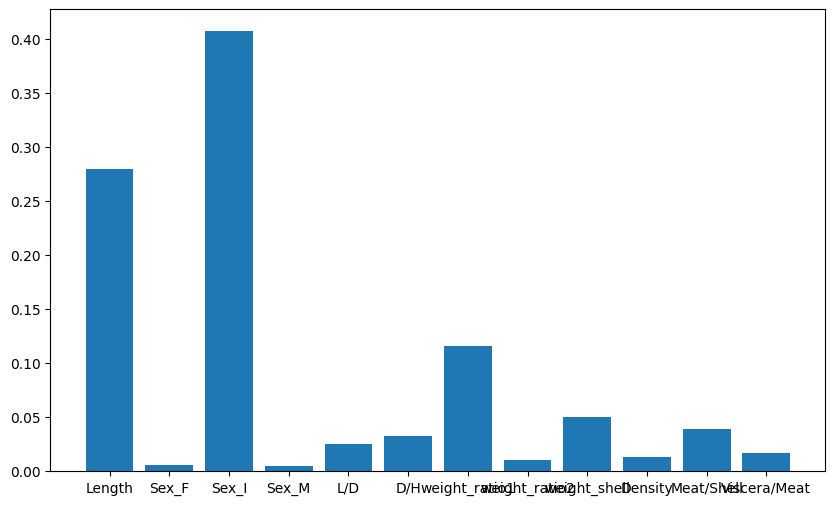

In [121]:
plt.figure(figsize=(10,6))
plt.bar(x_train.columns, model_gs.feature_importances_)